In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
def d_dim_Gaussian(Dimension, mean=0, var=1, N=1):     #returns N no. points of d dimensional iid gaussian 
    u=mean                                             #i.e. an N length array of d-dimensional points
    d=Dimension
    v=var
    cov=np.zeros((d,d))
    np.fill_diagonal(cov,v)    #fill the diagonal of zero matrix, cov with the variance to get covariance matrix
    mean=np.ones(d)*u            #mean matrix
    
    count=0
    centre=np.zeros(d)       #d-dimensioinal centre point
    d1=(d**0.5)-2*(d**(0.25))
    d2=(d**0.5)+2*(d**(0.25))

    for i in range(N):
        point=np.random.multivariate_normal(mean, cov)
        distance=np.linalg.norm(point-centre)
        if distance>=d1:
            if distance<=d2:
                count+=1
    return count

## A 5-dimensional Gaussian point

In [53]:
d=5
mean=0
var=1
mean=np.ones(d)*mean
cov=np.zeros((d,d))
np.fill_diagonal(cov,var)
Points=np.random.multivariate_normal(mean, cov)
Points

array([ 0.01354818,  0.18887885,  1.34525743, -1.78981389,  1.01888728])

## Generating 1M d-dimensional points and finding how many of them lie in the range [d1,d2]

In [93]:
#generating 1M d-dim gaussian points
d=10
mean=0
var=1
N=10**6
count=d_dim_Gaussian(d,mean,var,N)
count/10**6

0.999999

## Plotting fraction of points in the given range v/s d as it varies from 10 to 1000

5   0.99998
55   1.0
105   1.0
155   1.0
205   1.0


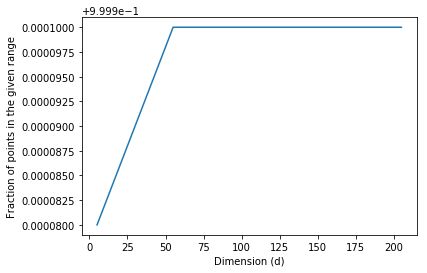

In [87]:
X=range(5,250,50)
Y=[]
mean=0
var=1
N=10**5
for d in X:
    count=d_dim_Gaussian(d,mean,var,N)
    frac=np.float64(count)/N
    print(d," ",frac)
    Y.append(frac)
plt.plot(X,Y)
plt.xlabel("Dimension (d)")
plt.ylabel("Fraction of points in the given range")
plt.show()